In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
import timeit
from sklearn.metrics import plot_confusion_matrix
# import tensorflow as tf
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()  

In [61]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data ', header=None)
print(df.shape)
df.head(10)

(198, 35)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.013570,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,0.08910,0.1727,0.05767,0.5285,0.8434,3.592,61.21,0.003703,0.02354,0.02222,0.013320,0.01378,0.003926,23.39,25.45,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20


In [62]:
df.isnull().sum(axis=0).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
df[df[34] == '?'] = df[df[34] == '?'].replace({'?': '0'})
df[34] = df[34].astype(int)
df[1] = df[1].map({'N': 0, 'R': 1})
df[1] = df[1].astype(int)

In [64]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,1,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.013570,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
6,844359,0,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,0.08910,0.1727,0.05767,0.5285,0.8434,3.592,61.21,0.003703,0.02354,0.02222,0.013320,0.01378,0.003926,23.39,25.45,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,0
7,844582,1,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
8,844981,0,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1
9,845010,0,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20


In [65]:
df = df.drop([0,2], axis=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
df[df.drop([1], axis=1).columns] = \
  scaler.fit_transform(df[df.drop([1], axis=1).columns])
  
df.head()

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0,-0.130916,0.191696,-0.172414,-0.310104,-0.428653,-0.566233,-0.579862,-0.444524,-0.356813,-0.445645,-0.469481,-0.027094,-0.535087,-0.618821,-0.875909,-0.892810,-0.678007,-0.725481,-0.655117,-0.580232,-0.211306,0.241862,-0.257648,-0.453357,-0.465634,-0.719298,-0.493866,-0.326394,-0.561601,-0.657746,-0.041667,-0.629630
1,0,-0.134604,-1.000000,-0.076225,-0.322813,0.245662,0.745242,0.370935,0.401846,0.282910,0.206188,0.109033,-0.654112,0.226354,-0.076786,-0.737765,-0.348817,-0.355863,-0.372595,-0.156716,-0.109910,0.125168,-0.959842,0.352821,-0.109900,0.141375,0.220415,0.200538,0.809422,0.196925,-0.162272,-0.458333,-0.851852
2,0,0.280885,-0.511419,0.190563,0.071171,-0.615947,-0.450914,-0.495954,-0.320139,0.183603,-0.582539,-0.518090,-0.841829,-0.542344,-0.548624,-0.754067,-0.576066,-0.667921,-0.244721,-0.122068,-0.311078,0.082100,-0.737755,0.006118,-0.151138,-0.475585,-0.416722,-0.446048,0.333359,0.091662,-0.532599,-0.562500,-1.000000
3,0,-0.942225,-0.307958,-0.896915,-0.974052,0.936899,0.792727,0.079490,-0.061419,0.488453,1.000000,-0.628600,-0.494476,-0.622000,-0.912321,-0.547272,0.050081,-0.312509,-0.208353,0.970302,0.415672,-0.814266,-0.401886,-0.812780,-0.964889,0.818040,0.619148,0.156908,0.748957,1.000000,0.547422,-0.666667,-1.000000
4,1,0.148125,-0.725952,0.147005,-0.009320,-0.273483,-0.346147,-0.135991,-0.071369,-0.421478,-0.636364,-0.306670,-0.733070,-0.293312,-0.467236,-0.380037,-0.730377,-0.308445,-0.197794,-0.631511,-0.297830,-0.129655,-1.000000,-0.087695,-0.371469,-0.211174,-0.694663,-0.343781,0.021851,-0.684999,-0.714810,-0.354167,-1.000000


In [66]:
x = df.drop([1], axis=1)
y = df[1]

In [47]:
class Adaline_neuron(object):
    def __init__(self, learningRate=0.01, x_len=2):
        self.learningRate = learningRate
        self.weights = np.array([np.zeros(x_len+1)]).transpose()

    def fit(self, x_train, y_train):
        y_train = np.array(y_train, ndmin=2).T
        nonCcount = -1*np.sum(y_train[y_train == -1])
        Ccount = np.sum(y_train[y_train == 1])
        tempX = x_train.copy()
        addWeights = []
        xi = tempX.iloc[:]
        output = self.activation(xi)
        errors = y_train - output
        self.weights[1:] += self.learningRate * xi.T.dot(errors)
        self.weights[0] += self.learningRate * errors.sum()
        

    def activation(self, inputs) -> np.ndarray:
        return np.dot(inputs, self.weights[1:]) + self.weights[0]

    def predict(self, x_test) -> np.ndarray:
        tempX = x_test.copy()
        xi = tempX.iloc[:]
        ans = self.activation(xi)
        pred = np.array([ans])
        return np.where(pred[0] >= 0.5, 1, 0)

    def score(self, x_test, y_test):
        y_test = np.array(y_test, ndmin=2).T
        output = np.subtract(self.predict(x_test), y_test)
        return (len(output[output == 0]) / y_test.shape[0])

0.8333333333333334


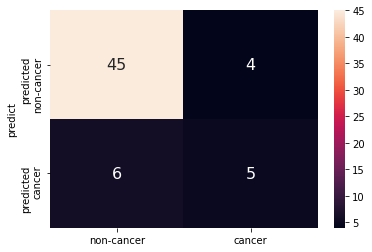

0.8166666666666667


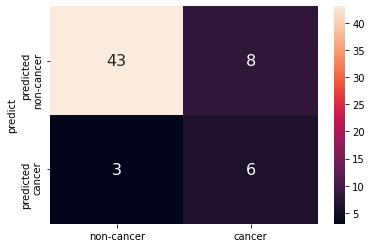

0.85


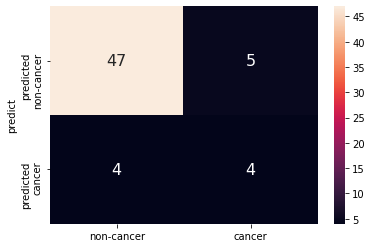

In [ ]:
scores = []
cms = []
start = timeit.default_timer()
for i in [4, 8, 27]: #range(20, 30)[4, 8, 27]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    model = Adaline_neuron(learningRate=0.0015, x_len=x.shape[1])
    for iteration in range(30000):
        model.fit(x_train, y_train)

    score = model.score(x_test, y_test)
    print(score)
    scores.append(score)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)
    df_cm = pd.DataFrame({'predict': ["predicted\nnon-cancer", "predicted\ncancer"],
                   'non-cancer': cm[0],
                   'cancer': cm[1]})
    df_cm = df_cm.set_index(['predict'])
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.show()


In [ ]:
stop = timeit.default_timer()
print('Adaline Train time ', stop - start, ' sec')
print(scores)
print("mean: ", np.mean(scores))
print("std: ", np.std(scores))

Adaline Train time  90.29980244699982  sec
[0.8333333333333334, 0.8166666666666667, 0.85]
[[45  6]
 [ 4  5]]
[[43  3]
 [ 8  6]]
[[47  4]
 [ 5  4]]
mean:  0.8333333333333334
std:  0.01360827634879543


In [67]:
from sklearn.datasets import load_breast_cancer
extra_df = load_breast_cancer()
extra_x_train, extra_x_test, extra_y_train, extra_y_test = train_test_split(extra_df.data, 
                                                    extra_df.target, 
                                                    stratify=extra_df.target, 
                                                    random_state=66)

In [68]:
extra_df.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Dropout , BatchNormalization
from tensorflow import keras 

num_classes = 2

model = Sequential()
model.add(Dense(units=30, activation='relu' , input_shape = (30, )))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

0
Train on 426 samples
426/426 - 0s - loss: 0.9206 - acc: 0.7324


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1
Train on 426 samples
426/426 - 0s - loss: 0.6766 - acc: 0.8192
2
Train on 426 samples
426/426 - 0s - loss: 0.3643 - acc: 0.8920
3
Train on 426 samples
426/426 - 0s - loss: 0.2497 - acc: 0.9038
4
Train on 426 samples
426/426 - 0s - loss: 0.2387 - acc: 0.9131
5
Train on 426 samples
426/426 - 0s - loss: 0.2890 - acc: 0.8991
6
Train on 426 samples
426/426 - 0s - loss: 0.2424 - acc: 0.9108
7
Train on 426 samples
426/426 - 0s - loss: 0.2201 - acc: 0.9202
8
Train on 426 samples
426/426 - 0s - loss: 0.2626 - acc: 0.8967
9
Train on 426 samples
426/426 - 0s - loss: 0.2464 - acc: 0.9155
10
Train on 426 samples
426/426 - 0s - loss: 0.2250 - acc: 0.9131
11
Train on 426 samples
426/426 - 0s - loss: 0.2126 - acc: 0.9225
12
Train on 426 samples
426/426 - 0s - loss: 0.2087 - acc: 0.9272
13
Train on 426 samples
426/426 - 0s - loss: 0.2116 - acc: 0.9225
14
Train on 426 samples
426/426 - 0s - loss: 0.2364 - acc: 0.9296
15
Train on 426 samples
426/426 - 0s - loss: 0.2166 - acc: 0.9272
16
Train on 426 sam

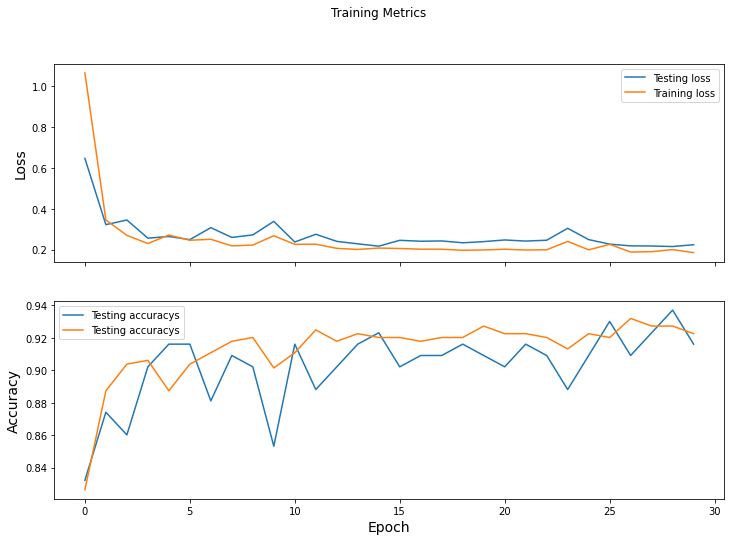

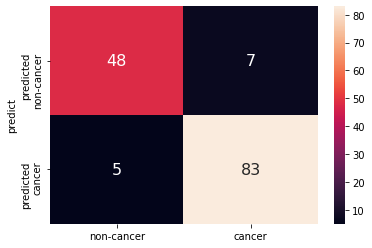

0.916083916083916
0
Train on 426 samples
426/426 - 0s - loss: 7.4532 - acc: 0.3028


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1
Train on 426 samples
426/426 - 0s - loss: 4.3563 - acc: 0.2535
2
Train on 426 samples
426/426 - 0s - loss: 2.9152 - acc: 0.2958
3
Train on 426 samples
426/426 - 0s - loss: 2.0717 - acc: 0.3592
4
Train on 426 samples
426/426 - 0s - loss: 1.5128 - acc: 0.4343
5
Train on 426 samples
426/426 - 0s - loss: 1.0932 - acc: 0.5423
6
Train on 426 samples
426/426 - 0s - loss: 0.7955 - acc: 0.6714
7
Train on 426 samples
426/426 - 0s - loss: 0.6587 - acc: 0.7324
8
Train on 426 samples
426/426 - 0s - loss: 0.5717 - acc: 0.7723
9
Train on 426 samples
426/426 - 0s - loss: 0.5533 - acc: 0.7770
10
Train on 426 samples
426/426 - 0s - loss: 0.4828 - acc: 0.8099
11
Train on 426 samples
426/426 - 0s - loss: 0.4392 - acc: 0.8404
12
Train on 426 samples
426/426 - 0s - loss: 0.4244 - acc: 0.8498
13
Train on 426 samples
426/426 - 0s - loss: 0.3819 - acc: 0.8592
14
Train on 426 samples
426/426 - 0s - loss: 0.3890 - acc: 0.8357
15
Train on 426 samples
426/426 - 0s - loss: 0.3531 - acc: 0.8662
16
Train on 426 sam

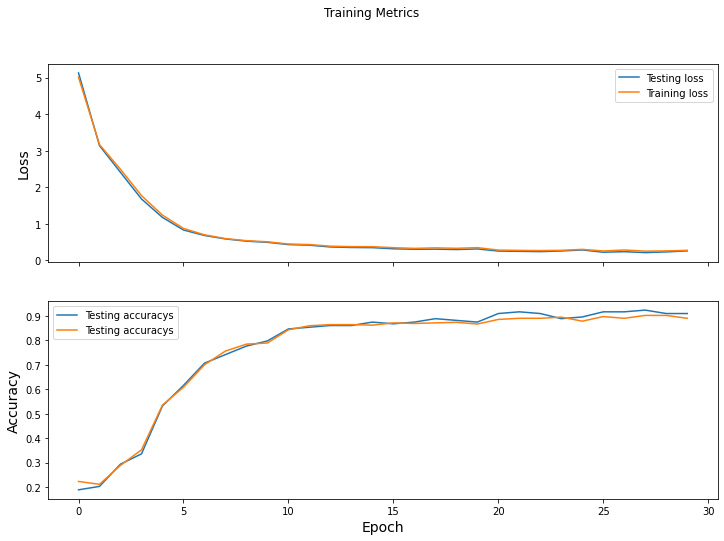

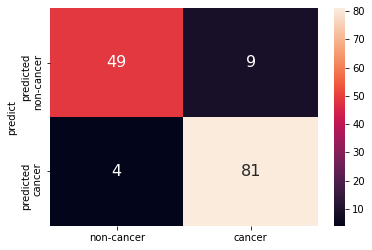

0.9090909090909091
0
Train on 426 samples
426/426 - 0s - loss: 16.8934 - acc: 0.3991


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1
Train on 426 samples
426/426 - 0s - loss: 4.4623 - acc: 0.5423
2
Train on 426 samples
426/426 - 0s - loss: 1.4341 - acc: 0.5047
3
Train on 426 samples
426/426 - 0s - loss: 0.6199 - acc: 0.7277
4
Train on 426 samples
426/426 - 0s - loss: 0.4510 - acc: 0.8239
5
Train on 426 samples
426/426 - 0s - loss: 0.3393 - acc: 0.8732
6
Train on 426 samples
426/426 - 0s - loss: 0.3249 - acc: 0.8638
7
Train on 426 samples
426/426 - 0s - loss: 0.2940 - acc: 0.8991
8
Train on 426 samples
426/426 - 0s - loss: 0.2948 - acc: 0.8897
9
Train on 426 samples
426/426 - 0s - loss: 0.2871 - acc: 0.8944
10
Train on 426 samples
426/426 - 0s - loss: 0.2533 - acc: 0.9131
11
Train on 426 samples
426/426 - 0s - loss: 0.2604 - acc: 0.9061
12
Train on 426 samples
426/426 - 0s - loss: 0.2479 - acc: 0.9085
13
Train on 426 samples
426/426 - 0s - loss: 0.2941 - acc: 0.8967
14
Train on 426 samples
426/426 - 0s - loss: 0.2554 - acc: 0.9085
15
Train on 426 samples
426/426 - 0s - loss: 0.2320 - acc: 0.9155
16
Train on 426 sam

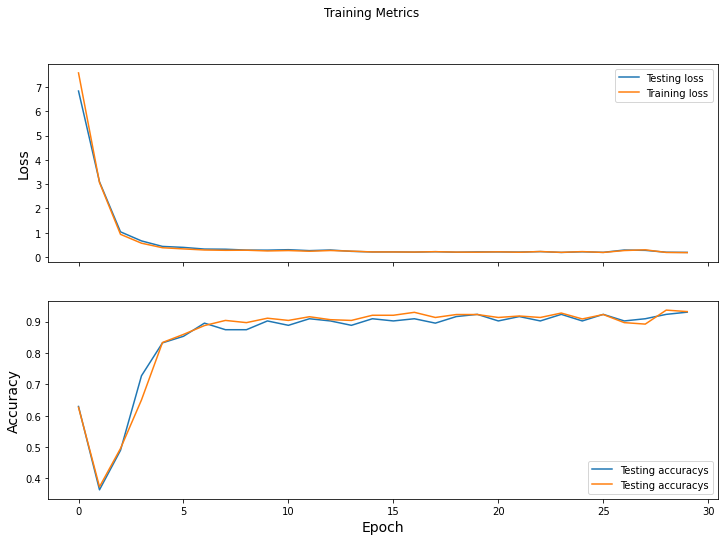

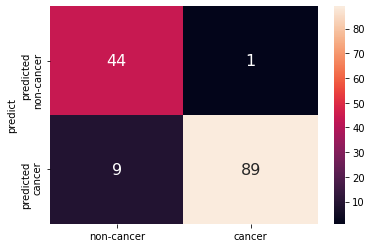

0.9300699300699301


In [99]:
for j in range(3): 
    extra_x_train, extra_x_test, extra_y_train, extra_y_test = train_test_split(extra_df.data, 
                                                        extra_df.target, 
                                                        stratify=extra_df.target, 
                                                        random_state=j)
    num_classes = 2
    model = Sequential()
    model.add(Dense(units=30, activation='relu' , input_shape = (30, )))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units = num_classes, activation='softmax'))
    model.compile(loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'], optimizer=keras.optimizers.Adam(learning_rate=0.001))
    accuracys_train = []
    accuracys_test = []
    loss_train = []
    loss_test = []
    for i in range(30):
        print(i)
        model.fit(extra_x_train, extra_y_train, epochs=1, verbose=2)
        train_acc, train_loss = model.evaluate(extra_x_train, extra_y_train)
        accuracys_train.append(train_loss)
        loss_train.append(train_acc)
        test_acc, test_loss = model.evaluate(extra_x_test, extra_y_test)
        accuracys_test.append(test_loss)
        loss_test.append(test_acc)

    fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
    fig.suptitle('Training Metrics')

    axes[0].set_ylabel("Loss", fontsize=14)
    axes[0].plot(loss_test, label='Testing loss')
    axes[0].plot(loss_train, label='Training loss')
    axes[0].legend()

    axes[1].set_ylabel("Accuracy", fontsize=14)
    axes[1].set_xlabel("Epoch", fontsize=14)
    axes[1].plot(accuracys_test, label='Testing accuracys')
    axes[1].plot(accuracys_train, label='Testing accuracys')
    axes[1].legend()
    plt.show()

    # score = model.score(extra_x_test, extra_y_test)
    # print(score)
    # scores.append(score)
    y_pred = np.argmax(model.predict(extra_x_test), axis=1)
    # print(np.argmax(y_pred, axis=1))
    # print(extra_y_test)
    cm = confusion_matrix(extra_y_test, y_pred)
    df_cm = pd.DataFrame({'predict': ["predicted\nnon-cancer", "predicted\ncancer"],
                    'non-cancer': cm[0],
                    'cancer': cm[1]})
    df_cm = df_cm.set_index(['predict'])
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.show()
    right = np.array(y_pred - extra_y_test)
    acc = len(right[right == 0])/len(right)
    print(acc)

Train on 132 samples, validate on 66 samples
132/132 [==============================] - ETA: 0s - loss: 0.6783 - acc: 0.7197

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


132/132 [==============================] - 4s 27ms/sample - loss: 0.6783 - acc: 0.7197 - val_loss: 0.6572 - val_acc: 0.8485
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 723us/sample - loss: 0.6603 - acc: 0.7197 - val_loss: 0.6299 - val_acc: 0.8485
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 756us/sample - loss: 0.6420 - acc: 0.7197 - val_loss: 0.6020 - val_acc: 0.8485
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 733us/sample - loss: 0.6271 - acc: 0.7197 - val_loss: 0.5724 - val_acc: 0.8485
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 746us/sample - loss: 0.6184 - acc: 0.7197 - val_loss: 0.5423 - val_acc: 0.8485
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 772us/sample - loss: 0.6078 - acc: 0.7197 - val_loss: 0.5160 - val_acc: 0.8485
Train on 132 samples, vali

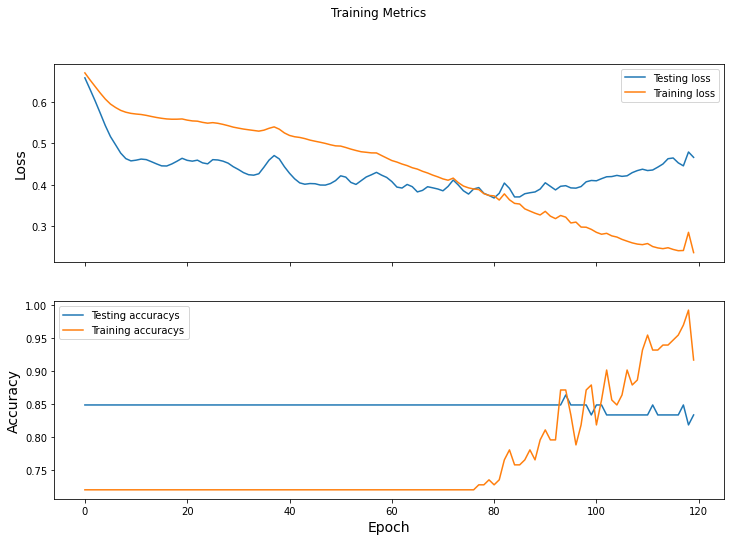

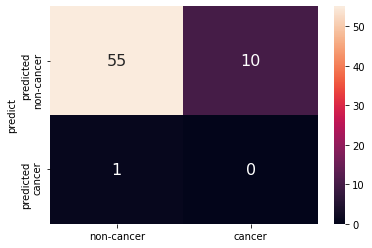

0.8333333
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 4s 28ms/sample - loss: 0.6976 - acc: 0.4167 - val_loss: 0.6897 - val_acc: 0.7879
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 786us/sample - loss: 0.6919 - acc: 0.6061 - val_loss: 0.6867 - val_acc: 0.8636
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 709us/sample - loss: 0.6913 - acc: 0.5682 - val_loss: 0.6839 - val_acc: 0.8333
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 718us/sample - loss: 0.6877 - acc: 0.6667 - val_loss: 0.6806 - val_acc: 0.8485
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 751us/sample - loss: 0.6871 - acc: 0.6591 - val_loss: 0.6773 - val_acc: 0.8485
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 806us/sample - loss: 0.6844 - acc: 0.7121 - val_lo

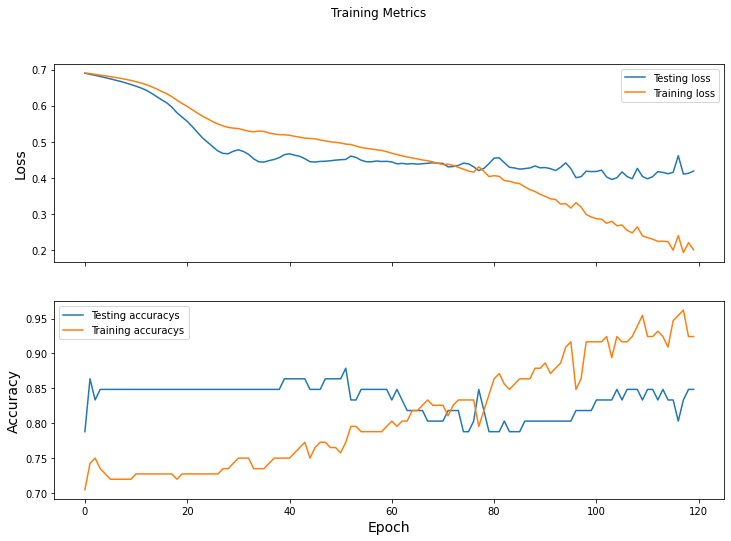

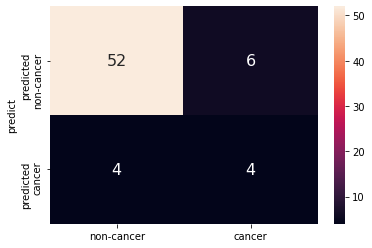

0.8484849
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 4s 28ms/sample - loss: 0.6914 - acc: 0.5985 - val_loss: 0.6900 - val_acc: 0.8182
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 709us/sample - loss: 0.6886 - acc: 0.6667 - val_loss: 0.6854 - val_acc: 0.8333
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 765us/sample - loss: 0.6847 - acc: 0.7121 - val_loss: 0.6813 - val_acc: 0.8333
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 796us/sample - loss: 0.6819 - acc: 0.7424 - val_loss: 0.6766 - val_acc: 0.8333
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 838us/sample - loss: 0.6812 - acc: 0.7273 - val_loss: 0.6710 - val_acc: 0.8333
Train on 132 samples, validate on 66 samples
132/132 [==============================] - 0s 746us/sample - loss: 0.6762 - acc: 0.7197 - val_lo

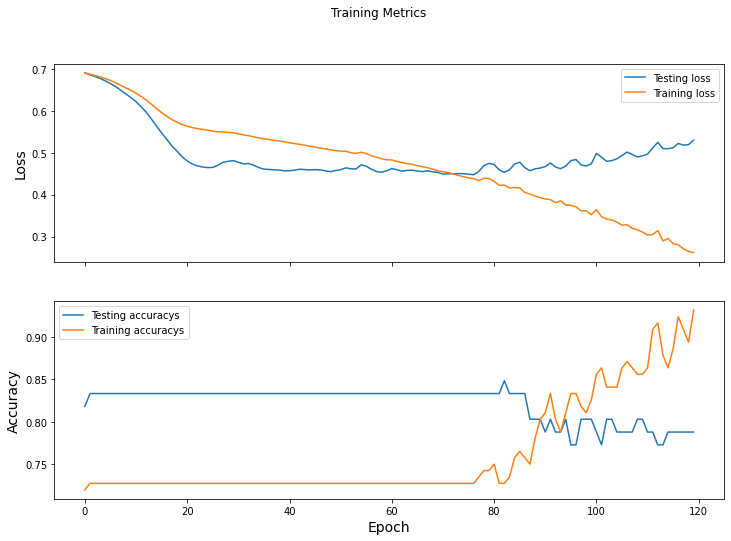

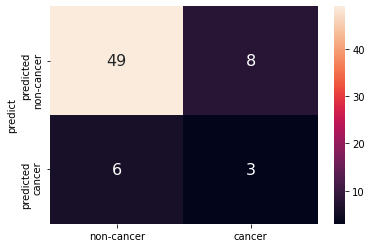

0.7878788


In [138]:
scores = []
for j, k in [(9,20),(7,5),(6,10)]:
    x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.33, random_state=j)
    num_classes = 2
    model = Sequential()
    model.add(Dense(units=500, activation='relu' , input_shape = (32, )))
    model.add(Dense(units=200, activation='relu'))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=30, activation='relu'))
    model.add(Dense(units=30, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=20, activation='relu'))
    model.add(Dense(units=20, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units = num_classes, activation='softmax'))
    model.compile(loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'], optimizer=keras.optimizers.Adam(learning_rate=0.0001))
    accuracys_train = []
    accuracys_test = []
    loss_train = []
    loss_test = []
    for i in range(120):
        model.fit(x_train, y_train, epochs=1, verbose=1, validation_data=(x_test, y_test))
        train_loss, train_acc = model.evaluate(x_train, y_train)
        accuracys_train.append(train_acc)
        loss_train.append(train_loss)
        test_loss, test_acc = model.evaluate(x_test, y_test)
        accuracys_test.append(test_acc)
        loss_test.append(test_loss)

    fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
    fig.suptitle('Training Metrics')

    axes[0].set_ylabel("Loss", fontsize=14)
    axes[0].plot(loss_test, label='Testing loss')
    axes[0].plot(loss_train, label='Training loss')
    axes[0].legend()

    axes[1].set_ylabel("Accuracy", fontsize=14)
    axes[1].set_xlabel("Epoch", fontsize=14)
    axes[1].plot(accuracys_test, label='Testing accuracys')
    axes[1].plot(accuracys_train, label='Training accuracys')
    axes[1].legend()
    plt.show()

    y_pred = np.argmax(model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame({'predict': ["predicted\nnon-cancer", "predicted\ncancer"],
                    'non-cancer': cm[0],
                    'cancer': cm[1]})
    df_cm = df_cm.set_index(['predict'])
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.show()
    print(test_acc)
    scores.append(test_acc)

In [139]:
print(scores)
print("mean: ", np.mean(scores))
print("std: ", np.std(scores))

[0.8333333, 0.8484849, 0.7878788]
mean:  0.82323235
std:  0.025752619
